In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [3]:
data = pd.read_csv("dynamic_api_call_sequence_per_malware_100_0_306.csv")
data.head()

data1 = data.drop(columns=['hash'],axis=1)
data1 = data1.dropna(how='any')
print(data1.shape)

(43876, 101)


In [5]:
from sklearn.model_selection import train_test_split
Y = data1['malware']
X = data1.drop(columns=['malware'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [6]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (35100, 100)
Y train shape:  (35100,)
X test shape:  (8776, 100)
Y test shape:  (8776,)


In [8]:
from sklearn.neural_network import MLPClassifier

# We define the model
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=1000, random_state=42)



In [9]:
# We train model
mlp.fit(X_train, Y_train)


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000,
              random_state=42)

In [10]:
# We predict target values
prediction = mlp.predict(X_test)

In [11]:
test_acc_mlp = round(mlp.fit(X_train,Y_train).score(X_test, Y_test)* 100, 2)
train_acc_mlp = round(mlp.fit(X_train, Y_train).score(X_train, Y_train)* 100, 2)

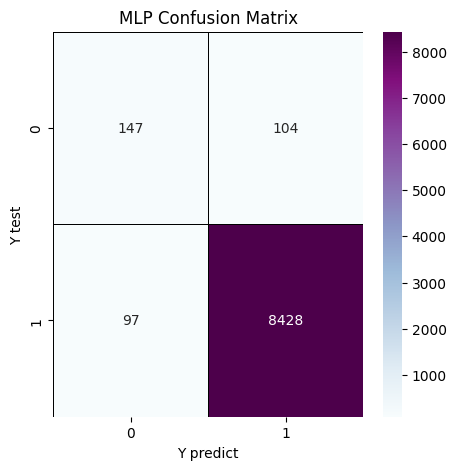

In [12]:
mlp_cm = confusion_matrix(Y_test, prediction)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mlp_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('MLP Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [13]:
model1 = pd.DataFrame({
    'Model': ['MLP'],
    'Train Score': [train_acc_mlp],
    'Test Score': [test_acc_mlp]
})
model1.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
0,MLP,99.14,97.71


In [14]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.99
